# Аналитика в авиакомпании

Вы аналитик российской авиакомпании F9, выполняющей внутренние пассажирские перевозки. Важно понять предпочтения пользователей, покупающих билеты на разные направления.

Вам предстоит изучить базу данных и проанализировать спрос пассажиров на рейсы в города, где проходят крупнейшие культурные фестивали.

**Шаг 1.  Аналитика средствами Python**

У вас есть файлы, в которых содержатся результаты запросов из предыдущих заданий.

**query_1.csv** — результат первого запроса. В нём содержится такая информация:

- *model* — **модель самолета;
- *flights_amount* — количество рейсов для каждой модели самолетов *model* в сентябре 2018 года.

**query_3.csv** — результат третьего запроса. В нём содержится такая информация:

- *city* — город;
- *average_flights* — среднее количество рейсов, прибывающих в город (*city*) за день в сентябре 2018 года.

 Для этих двух наборов данных нужно:

- импортировать файлы;
- изучить данные в них;
- проверить типы данных на корректность;
- выбрать топ-10 городов по количеству рейсов;
- построить графики: модели самолётов и количество рейсов, города и количество рейсов, топ-10 городов и количество рейсов;
- сделать выводы по каждому из графиков, пояснить результат.

**Шаг 2.  Проверка гипотезы средствами Python**

**query_last.csv** — результат последнего запроса. В нём следующая информация:

- *week_number* — **номер недели;
- *ticket_amount* — количество проданных билетов за неделю;
- *festival_week —* есть ли на этой неделе фестиваль;
- *festival_name —* название фестиваля.

Проверьте гипотезу: «Средний спрос на билеты во время фестивалей не отличается от среднего спроса на билеты в обычное время».

Пороговое значение *alpha* задайте самостоятельно.

Поясните:

- Как вы формулировали нулевую и альтернативную гипотезы;
- Какой критерий использовали для проверки гипотез и почему.

## Аналитика

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats as st
import numpy as np

Исследуем данные

In [2]:
models = pd.read_csv('/datasets/query_1.csv')
display(models.head(10))
print(models.info())
print(models.describe())

,model,flights_amount
0,Airbus A319-100,607
1,Airbus A321-200,960
2,Boeing 737-300,630
3,Boeing 767-300,600
4,Boeing 777-300,300
5,Bombardier CRJ-200,4446
6,Cessna 208 Caravan,4557
7,Sukhoi SuperJet-100,4185


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   model           8 non-null      object
 1   flights_amount  8 non-null      int64 
dtypes: int64(1), object(1)
memory usage: 256.0+ bytes
None
       flights_amount
count        8.000000
mean      2035.625000
std       1965.203947
min        300.000000
25%        605.250000
50%        795.000000
75%       4250.250000
max       4557.000000


In [3]:
flights = pd.read_csv('/datasets/query_3.csv')
display(flights.head(10))
print(flights.info())
print(flights.describe())

,city,average_flights
0,Абакан,3.870968
1,Анадырь,1.000000
2,Анапа,2.161290
3,Архангельск,5.354839
4,Астрахань,2.451613
5,Барнаул,2.612903
6,Белгород,6.000000
7,Белоярский,2.000000
8,Благовещенск,1.000000
9,Братск,1.000000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   city             101 non-null    object 
 1   average_flights  101 non-null    float64
dtypes: float64(1), object(1)
memory usage: 1.7+ KB
None
       average_flights
count       101.000000
mean          5.494189
std          13.119790
min           1.000000
25%           2.000000
50%           3.000000
75%           5.870968
max         129.774194


In [20]:
flights = flights.sort_values(by = 'average_flights', ascending = False)
flights['average_flights'] = flights['average_flights'].astype('int')
flights = flights.reset_index(drop = True)
top_10_cities = flights.head(10)
display(top_10_cities)

,city,average_flights
0,Москва,129
1,Санкт-Петербург,31
2,Новосибирск,17
3,Красноярск,11
4,Екатеринбург,11
5,Ростов-на-Дону,10
6,Пермь,10
7,Брянск,10
8,Сочи,9
9,Ульяновск,9


### Вывод
Датасеты загружены, данные изучены, типы данных поля average_flights был приведен из float к int. Были получены топ 10 городов с наибольшим средним кол-вом рейсов.

Изучим информацию о перелетах для разных самолетов

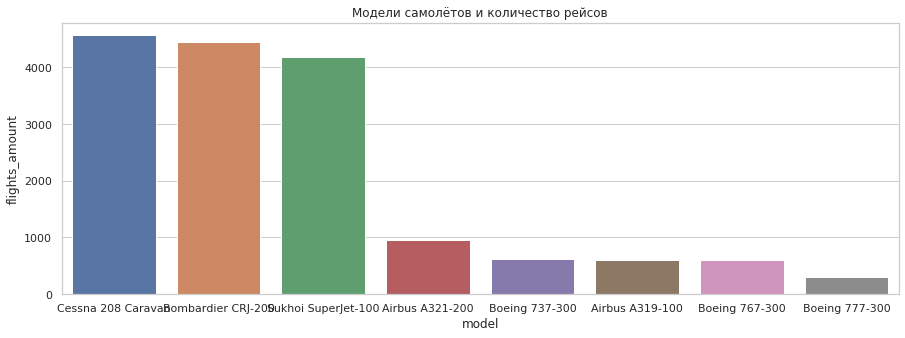

In [89]:
plt.figure(figsize=(15,5))
plt.title('Модели самолётов и количество рейсов')
sns.set(style="whitegrid")
ax = sns.barplot(x="model", y="flights_amount", data=models.sort_values(by = 'flights_amount', ascending = False))
plt.show()

#### Вывод
Был построен график зав-ти кол-ва перелетов от модели самолетов, как видно тройка лидеров имеет большой разрыв относительно самолетов компаний Airbus и Boeing. Интересно отметить, что лидируют 2 небольших самолета, вместимостью 13 и 50 чел, соответствено. На третьем месте бюджетный самолет вместимостью ~ 100 чел.

Рассмотрим зав-ть кол-ва перелетов от городов

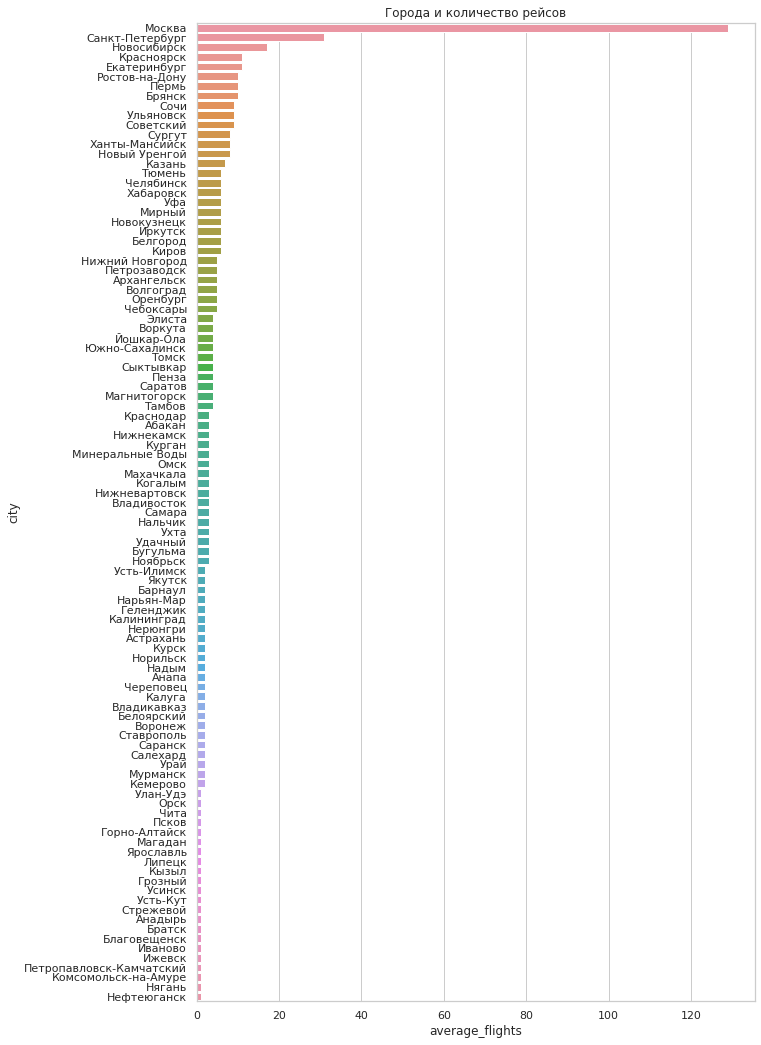

In [57]:
plt.figure(figsize=(10,18))
plt.title('Города и количество рейсов')
sns.set(style="whitegrid")
ax = sns.barplot(x="average_flights", y="city", data=flights)
plt.show()

#### Вывод
Был построен график зав-ти среднего кол-ва перелетов от города. Самый популярынй город с большим отрывом Москва, далее Санкт-Петербург и другие большие города России. Стоит отметить, что в топ-10 городов почти вошел город Советский с населением всего 30 тыс. чел., это связано с тем, что в этот город нет автодорог, только авиасообщение.

Выберем топ-10 городов по кол-ву рейсов.

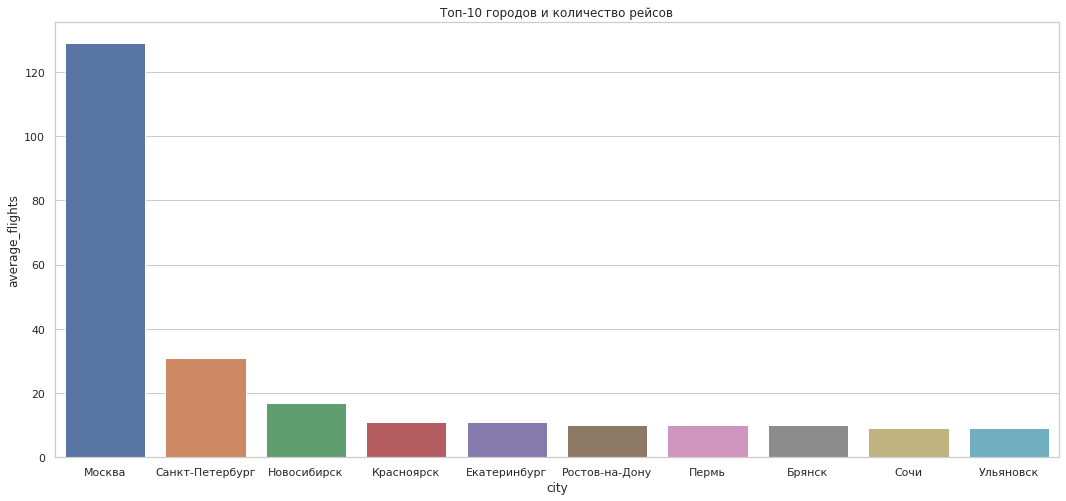

In [66]:
plt.figure(figsize=(18,8))
plt.title('Топ-10 городов и количество рейсов')
sns.set(style="whitegrid")
ax = sns.barplot(x="city", y="average_flights", data=top_10_cities)
plt.show()

#### Вывод
Топ-10 городов не вызывает никаких вопросов, распределение популярности городов логично.

## Проверка гипотезы

Сначала откроем датасет с информацией о фестивалях

In [4]:
festivals = pd.read_csv('/datasets/query_last.csv')

In [71]:
display(festivals.head(10))
display(festivals.info())
display(festivals.describe())

,week_number,ticket_amount,festival_week,festival_name
0,30,43568,30.0,Park Live
1,31,51034,31.0,Пикник Афиши
2,32,51675,NaN,NaN
3,33,51378,NaN,NaN
4,34,51492,NaN,NaN
5,35,51360,NaN,NaN
6,36,51386,36.0,Видфест
7,37,51670,NaN,NaN
8,38,51518,NaN,NaN
9,39,51623,NaN,NaN


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   week_number    10 non-null     int64  
 1   ticket_amount  10 non-null     int64  
 2   festival_week  3 non-null      float64
 3   festival_name  3 non-null      object 
dtypes: float64(1), int64(2), object(1)
memory usage: 448.0+ bytes


None

,week_number,ticket_amount,festival_week
count,10.00000,10.000000,3.000000
mean,34.50000,50670.400000,32.333333
std,3.02765,2502.752716,3.214550
min,30.00000,43568.000000,30.000000
25%,32.25000,51364.500000,30.500000
50%,34.50000,51439.000000,31.000000
75%,36.75000,51596.750000,33.500000
max,39.00000,51675.000000,36.000000


### Проверка гипотезы

Сформулируем гипотезу и выберем критерий для ее оценивания в соответствии с размером выборок.


Проверка гипотезы :  «Средний спрос на билеты во время фестивалей не отличается от среднего спроса на билеты в обычное время».

Так как размер выборок маленький, по 3 и 7 элементов, то к вопросу гипотез стоит подходить с большой осторожностью. В данном случае для проверки гипотезы я буду использовать непараметричческий критерий: U-критерий Манна — Уитни, т.к. он применим для выборок имеющихся размеров.


Нулевая гипотеза - средние обоих выборок равны между собой.

Альтернативная - средние обоих выборок  не равны между собой.

В качестве уровня значимости выбрано значение: 0.05.

In [87]:
alpha = 0.05# выбран уровень стат.значимости
not_fest_weeks_mean = festivals[festivals['festival_week'].isna()]['ticket_amount']
fest_weeks_mean = festivals[festivals['festival_week'].notna()]['ticket_amount']

print('Размер 1ой выборки: {}'.format(len(fest_weeks_mean)))
print('Размер 2ой выборки: {}'.format(len(not_fest_weeks_mean)))

Размер 1ой выборки: 3
Размер 2ой выборки: 7


In [88]:
results = st.mannwhitneyu(
    fest_weeks_mean,
    not_fest_weeks_mean
)

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.03412374418900064
Отвергаем нулевую гипотезу


## Вывод
Результат стат.теста по U-критерию Манна — Уитни говорит о том, что нулевую можно отвергнуть при выбранном уровне стат.значимости 0.05. Но т.к. наблюдаемые выборки имеют слишком мало элементов, то к такому результату стоит относиться весьма условно и делать выводы о росте продаж билетов в недели фестивалей пока рано. На мой взгляд лучше собрать бОльшое кол-во данных, для проверки гипотез и построение дальнейших выводов на их основе.